In [1]:
from generate_paths import get_all_files
import six.moves.cPickle as pickle
import numpy as np
import copy
from joblib import Parallel, delayed

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
from hmmlearn import hmm

In [4]:
feat_name = 'segments_timbre'

In [18]:
features = []
with open(feat_name+'.pkl', 'rb') as pickle_file:
    try:
       for _ in range(500000):
            entry = pickle.load(pickle_file, encoding='bytes', fix_imports=True)
            features.append(entry)
    except EOFError:
        pass

In [19]:
np.array(features[0][1][feat_name]).shape

(1817, 12)

In [20]:
data = map(lambda x: x[1], features)
data = list(filter(lambda x: 'year' in x and x['year']>=1965, data))
len(data)

248885

In [21]:
granularity = 5
labels = list(map(lambda x: x['year'], data))
labels -= min(labels)
labels = np.array(list(map(int, labels)))
classes = list(map(lambda x: x//granularity, labels))

In [23]:
classes_to_data = {}
for i,entry in enumerate(data):
    cls = classes[i]
    classes_to_data.setdefault(cls, []).append(entry)
for cls in classes_to_data:
    classes_to_data[cls] = np.random.permutation(classes_to_data[cls])
min_len = min([len(x) for x in classes_to_data.values()])
uniform_data = np.array([subdata[:min_len] for subdata in classes_to_data.values()]).flatten()
data = uniform_data
len(data)

6610

In [9]:
BASELINE = 33.95
np.mean((labels-BASELINE)**2)

95.198665933375239

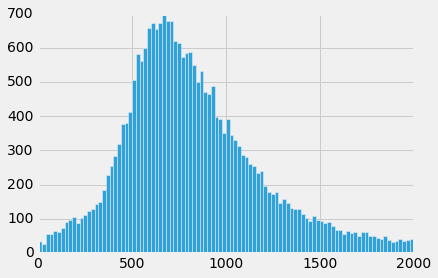

In [10]:
beat_lengths = np.array(list(map(lambda x: len(x[feat_name]), data)))
plt.hist(beat_lengths[beat_lengths<2000], 100);

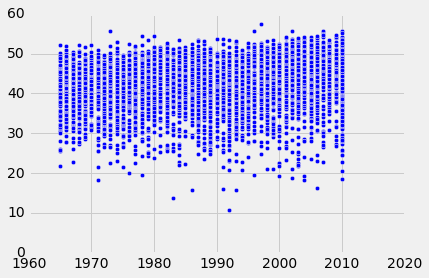

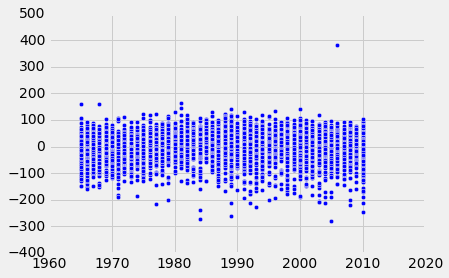

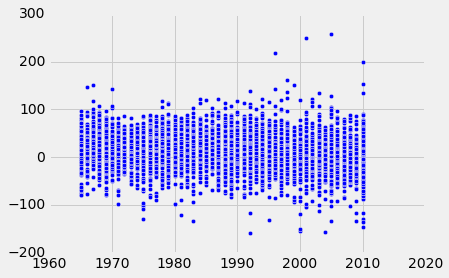

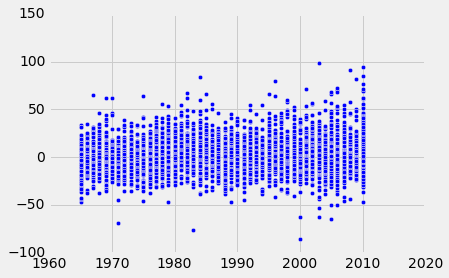

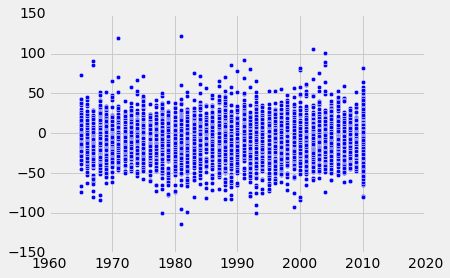

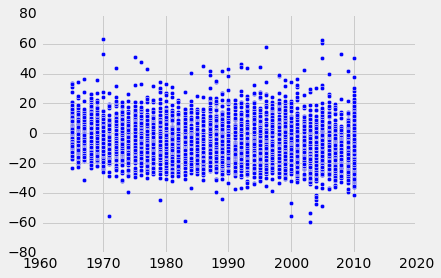

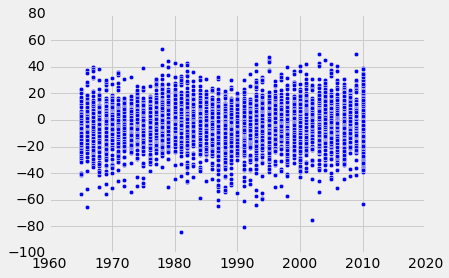

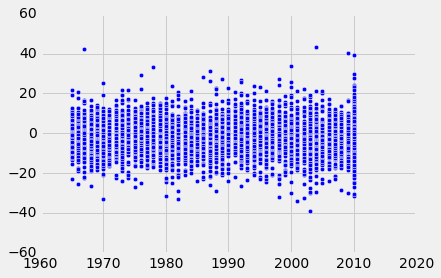

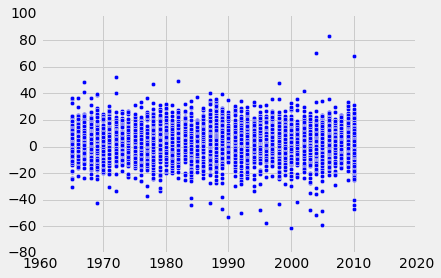

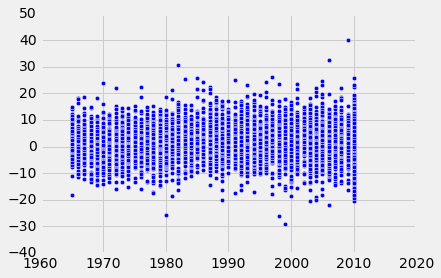

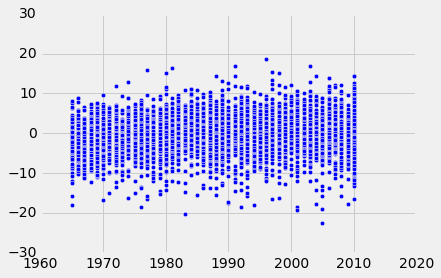

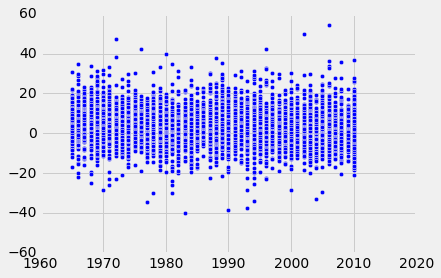

In [24]:
X = list(map(lambda x: x['year'], data))
YY = list(map(lambda x: np.mean(x[feat_name], axis=0), data))
for i in range(12):
    Y = [y[i] for y in YY]
    plt.scatter(X, Y)
    plt.show()

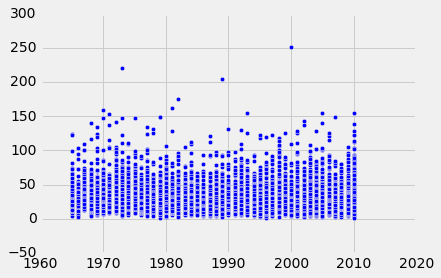

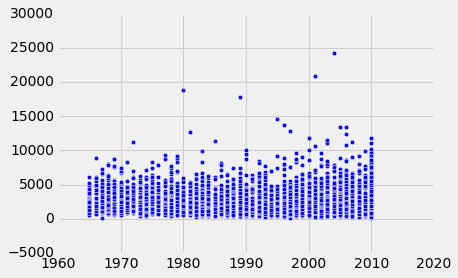

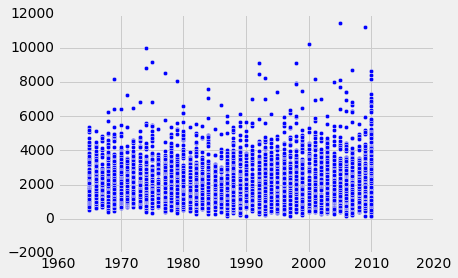

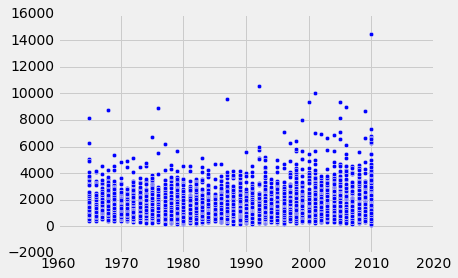

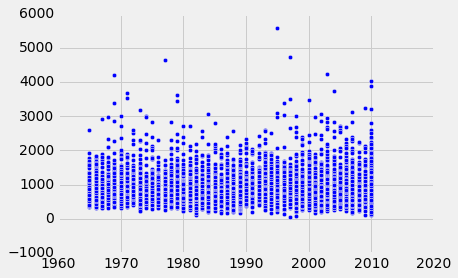

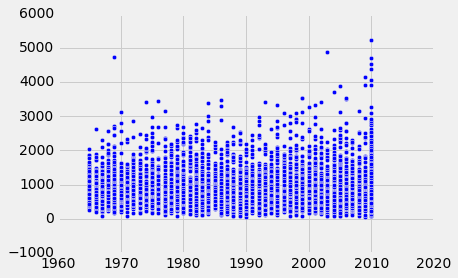

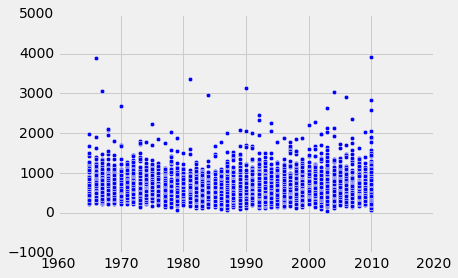

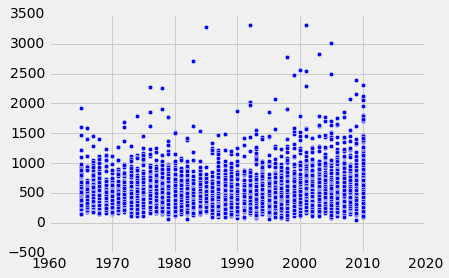

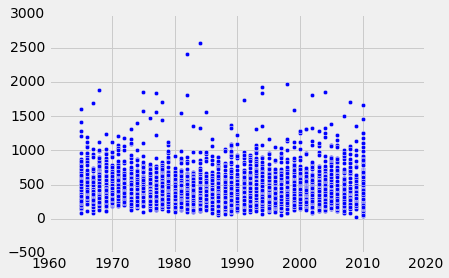

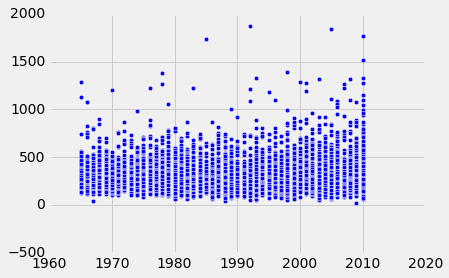

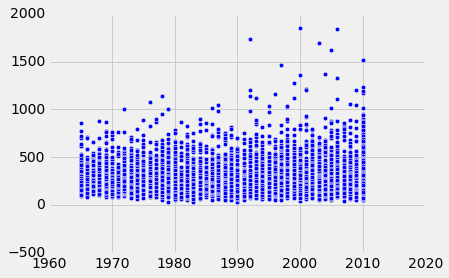

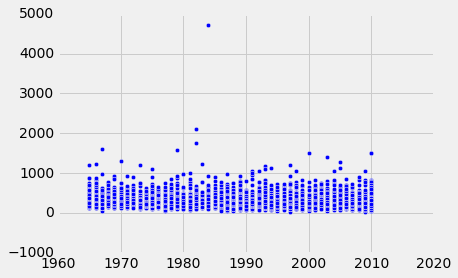

In [25]:
X = list(map(lambda x: x['year'], data))
YY = list(map(lambda x: np.var(x[feat_name], axis=0), data))
for i in range(12):
    Y = [y[i] for y in YY]
    plt.scatter(X, Y)
    plt.show()